In [1]:
import numpy as np
from BoxBasis import * 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
device = 'cpu'
x1 = torch.linspace(-1.5, 1.5, 200).repeat((200, 1)).to(device)
x2 = torch.flipud(torch.linspace(-1.5, 1.5, 200).repeat((200, 1)).to(device).transpose(1, 0))
zero = torch.linspace(-1.5, 1.5, 200).repeat((200, 1)).to(device) * 0
varphi = torch.maximum(1 + torch.minimum(torch.minimum(x1, x2), zero) - torch.maximum(torch.maximum(x1, x2), zero), zero)

In [3]:
N_theta = 360
thetas = torch.linspace(0, 2 * torch.pi, N_theta).to(device).float()


load = True
if load: 
    box_basis = BoxBasis(load=True, name='saved_results/sinogram_box.pickle')
else:
    box_basis = BoxBasis(load=False)
    with torch.no_grad():
        box_basis.construct_x_ray_look_up(thetas, name='saved_results/sinogram_box.pickle')
        box_basis.construct_x_ray_look_up_torch()

In [4]:
N_y = 1000
y_values = torch.linspace(-1.5, 1.5, N_y)[:, None, None]
X = torch.zeros((N_y, N_theta, 1, 1))
for i, theta in enumerate(thetas): 
    X[:, i:i+1] = box_basis.x_ray(i, y_values)

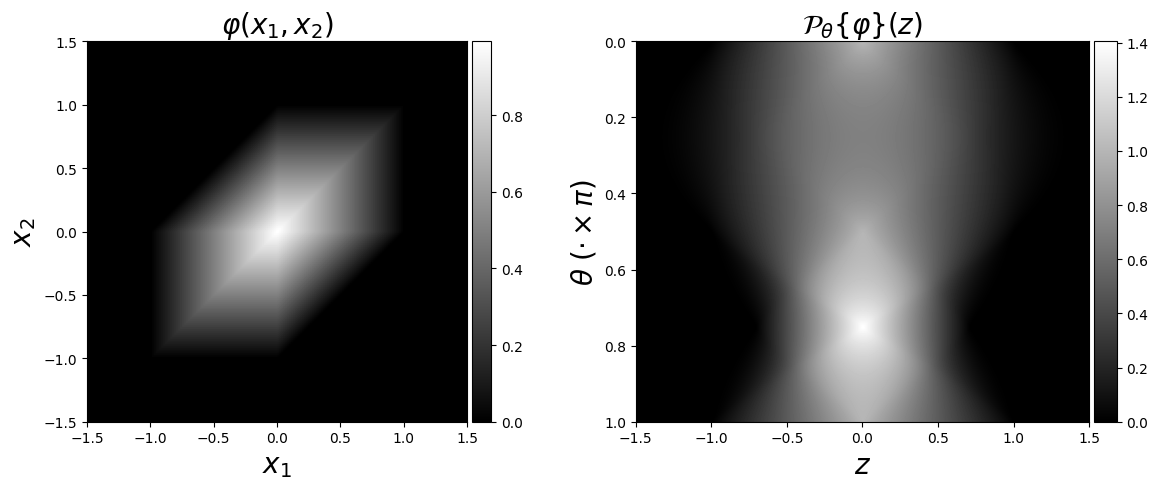

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
fs = 20
im = plt.imshow(varphi, cmap='gray', extent=[-1.5, 1.5, -1.5, 1.5], aspect="equal")
plt.xlabel('$x_1$', fontsize=fs)
plt.ylabel('$x_2$', fontsize=fs)
plt.title(r'$\varphi(x_1, x_2)$', fontsize=fs)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.subplot(122)
im = plt.imshow(X[:, :180, 0, 0].transpose(1, 0), cmap='gray', extent=[-1.5, 1.5, 1, 0], aspect="auto")
plt.xlabel('$z$', fontsize=fs)
plt.ylabel(r'$\theta$ ($\cdot \times \pi$)', fontsize=fs)
plt.title(r'$\mathcal{P}_{\theta}\{\varphi\}(z)$', fontsize=fs)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.savefig('saved_figs/box_and_proj.png', bbox_inches="tight")
plt.show()